In [1]:
import tweepy
import csv
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:

consumer_key = 'QoPTOZfeJcoglJQGNguodNSN1'
consumer_secret = 'hv5v4zYKceg0fvynAmPSrJd42Zx7zJgvRuvnh47w5mg15XU0Yr'
access_token = '1133207662173270016-MMrygDCIIj4SD8P2XoPcrxrT9upfCj'
access_token_secret = 'hCG3ccyFliyytU2TRbpAHKx5hILfUbHQ8f4APXKO74nsR'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)


In [5]:
#searching for hashtags that contain 'Quit smoking'
search = "#Quitsmoking" + " -filter:retweets"

In [10]:
#get 2000 tweets
tweets = tweepy.Cursor(api.search, 
                           q=search,
                           lang="en",
                           since="2020-04-01",
                       ).items(5000)

In [11]:
#columns pertaining to this project
columns = [tweet.user.screen_name, tweet.user.location, tweet.text,
        tweet.user.followers_count, tweet.geo, tweet.coordinates,
       tweet.favorite_count, tweet.retweet_count, tweet.created_at]

AttributeError: 'ItemIterator' object has no attribute 'user'

In [12]:
#get the data in a list form
info= [[tweet.user.screen_name, tweet.user.location, tweet.text,
        tweet.user.followers_count, tweet.geo, tweet.coordinates,
       tweet.favorite_count, tweet.retweet_count, tweet.created_at] for tweet in tweets]

In [16]:
df2 = pd.DataFrame(data=info,
                 columns = ['user_name','user_location','text'
                            ,'followers_count','geo','coordinates',
                           'favorite_count', 'retweet_count','created_at'])

In [17]:
len(df)

300

In [15]:
df.isna().sum() 

user_name            0
user_location        0
text                 0
followers_count      0
geo                299
coordinates        299
favorite_count       0
retweet_count        0
created_at           0
dtype: int64

In [129]:
df.geo.value_counts() 

{'type': 'Point', 'coordinates': [23.0985626, 72.58935213]}    1
{'type': 'Point', 'coordinates': [54.6833, 25.2833]}           1
Name: geo, dtype: int64

In [130]:
#remove geo and coordinates, insufficient data
df.drop(['geo','coordinates'], axis=1, inplace=True)

In [19]:
df2.head() 

,user_name,user_location,text,followers_count,geo,coordinates,favorite_count,retweet_count,created_at
0,TheNicSalt,,What’s your favorite flavor? 😋\n\n#thenicsalt ...,0,None,None,0,1,2020-05-21 22:53:28
1,2020qsmo,,"If you want to smoke, You do a shoulder rotati...",5,None,None,0,0,2020-05-21 22:33:05
2,sh0rtgeek,"Colorado, USA",6.5 days till my quit day for cigarettes. I'm ...,18,None,None,0,0,2020-05-21 20:13:08
3,dejardefumarQS,"Barcelona, Spain",DO IT NOW! #yesyoucan💪Today better than tomorr...,48,None,None,0,0,2020-05-21 19:44:21
4,PeninsulaQatar,Qatar,The findings showed that women with no history...,44200,None,None,2,0,2020-05-21 18:45:00


In [200]:
df.head() 

,user_name,user_location,text,followers_count,geo,coordinates,favorite_count,retweet_count,created_at
0,TISprogramme,"Perth, Western Australia",This video by the WA Country Health Service's ...,297,None,None,0,0,2020-05-19 02:08:00
1,vishnunrao,hyderabad,#SMOKING how dangerous and if you #quitsmoking...,78,None,None,0,0,2020-05-19 01:39:57
2,weightloss157,,Daily Habit Hacks Ebook: Daily Steps To Break ...,2971,None,None,0,0,2020-05-18 23:15:27
3,SunsetVapor,"Huntington Beach, CA",We’re just gona say “Normal” hours.\n\n#quitsm...,740,None,None,0,0,2020-05-18 21:57:31
4,tracey_adkin,,My #health improved with @quitnowapp #quitsmok...,7,None,None,1,0,2020-05-18 21:13:38


__Data Cleaning, Text cleaning__

In [201]:
contraction_map = {
"ain't": "is not","aren't": "are not","can't": "cannot","can't've": "cannot have","'cause": "because",
"could've": "could have","couldn't": "could not","couldn't've": "could not have","didn't": "did not",
"doesn't": "does not","don't": "do not","hadn't": "had not","hadn't've": "had not have","hasn't": "has not",
"haven't": "have not","he'd": "he would","he'd've": "he would have","he'll": "he will","he'll've": "he he will have","he's": "he is",
"how'd": "how did","how'd'y": "how do you","how'll": "how will","how's": "how is","I'd": "I would","I'd've": "I would have",
"I'll": "I will","I'll've": "I will have","I'm": "I am","I've": "I have","i'd": "i would","i'd've": "i would have","i'll": "i will",
"i'll've": "i will have","i'm": "i am","i've": "i have","isn't": "is not","it'd": "it would","it'd've": "it would have","it'll": "it will",
"it'll've": "it will have","it's": "it is","let's": "let us","ma'am": "madam","mayn't": "may not",
"might've": "might have","mightn't": "might not","mightn't've": "might not have","must've": "must have","mustn't": "must not",
"mustn't've": "must not have","needn't": "need not","needn't've": "need not have","o'clock": "of the clock",
"oughtn't": "ought not","oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not","shan't've": "shall not have",
"she'd": "she would","she'd've": "she would have","she'll": "she will","she'll've": "she will have",
"she's": "she is","should've": "should have","shouldn't": "should not","shouldn't've": "should not have","so've": "so have",
"so's": "so as","that'd": "that would","that'd've": "that would have","that's": "that is",
"there'd": "there would","there'd've": "there would have","there's": "there is","they'd": "they would","they'd've": "they would have","they'll": "they will","they'll've": "they will have",
"they're": "they are","they've": "they have","to've": "to have","wasn't": "was not",
"we'd": "we would","we'd've": "we would have","we'll": "we will","we'll've": "we will have","we're": "we are","we've": "we have",
"weren't": "were not","what'll": "what will","what'll've": "what will have","what're": "what are",
"what's": "what is","what've": "what have","when's": "when is","when've": "when have","where'd": "where did","where's": "where is",
"where've": "where have","who'll": "who will","who'll've": "who will have","who's": "who is","who've": "who have",
"why's": "why is","why've": "why have","will've": "will have","won't": "will not","won't've": "will not have","would've": "would have",
"wouldn't": "would not","wouldn't've": "would not have","y'all": "you all","y'all'd": "you all would","y'all'd've": "you all would have",
"y'all're": "you all are","y'all've": "you all have","you'd": "you would","you'd've": "you would have","you'll": "you will",
"you'll've": "you will have","you're": "you are","you've": "you have"
}

In [204]:
import re 
import unicodedata

def remove_special_chars(text, remove_digits=False):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

def remove_url_chars(text):
    text = re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", text)
    return text 

def expand_contractions(text, contraction_mapping=contraction_map):

    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction

    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text



In [205]:
#create dictionary of the functions to be applied
funcdict = {"1": remove_special_chars, "2": remove_accented_chars,
           "3": expand_contractions}

In [206]:
#apply the functions in a loop
for k,v in funcdict.items():
    df.text = df.text.apply(lambda x: v(x))

In [207]:
#remove new line chars and lowercase the letters.
df.text = df.text.replace('\n','', regex=True).str.lower() 

__Word Cloud__

In [210]:
text = " ".join(_ for _ in df.text)

In [211]:
text

'this video by the wa country health services ngamari free tis team highlights the negative effects starting httpstcogvvfqpfw7b smoking how dangerous and if you quitsmoking what are the healthbenefits just go through this diagram  httpstcoxs4ge0anbl daily habit hacks ebook daily steps to break bad habits amp create good ones monday may 19 2020 at 0215am httpstcogpdiem0zic were just gona say normal hoursquitsmoking startvaping vapefam vape vapersunite vapeitup vapeusa httpstcomncehxsugc my health improved with quitnowapp quitsmoking httpstcogcy1j689xr created by nicotine dependence specialist quit my way is currently helping people quitsmoking in the us canada httpstconpecr6dj1j unsure of the health benefits our hempderived cbd products have to offer click the link below and order today httpstcoy7wowfkcce yet another reason why smokers should quit smokingespecially when there is a bug which loves ace2 is around httpstco1edplf2nax ready to quitsmoking for good there are many support prog

In [212]:
import nltk
nltk.download('stopwords')
nltk.download('punkt') 

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/udipbohara/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/udipbohara/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

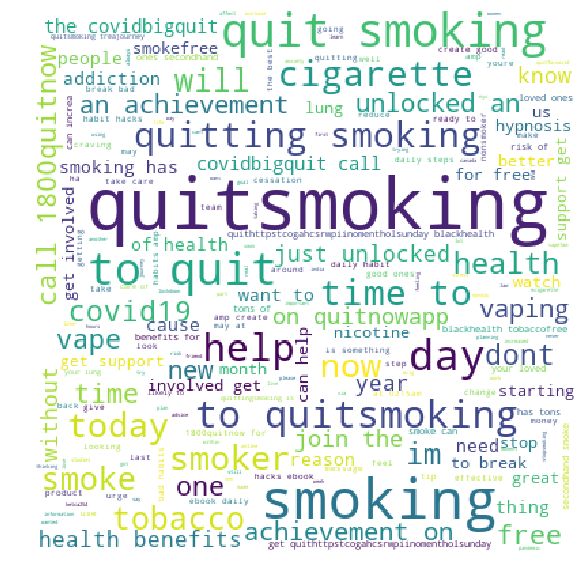

In [217]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
wc = WordCloud(background_color="white", max_words=200, width=400, height=400,  
               random_state=1).generate(text)
plt.figure(figsize=(20,10))
plt.imshow(wc)
plt.axis("off")
plt.show()

In [225]:
from collections import Counter
stopwords = STOPWORDS
#Getting the most common words

filtered_words = [word for word in text.split() if word not in stopwords]
counted_words = Counter(filtered_words)

words = []
counts = []
for letter, count in counted_words.most_common(10):
    words.append(letter)
    counts.append(count)


In [226]:
words

['quitsmoking',
 'smoking',
 'quit',
 'health',
 'help',
 'smoke',
 'time',
 'quitting',
 'call',
 'free']